# 1.0 Full Exploratory Data Analysis

## Libraries

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import final_project.utils.paths as path
import janitor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Testing conection with `paths.py`:

In [7]:
path.hello()

Hello Eddie!


## Download data

### Specify input and output files

In [8]:
covid_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

covid_file = path.data_raw_dir("time_series_covid19_confirmed_global.csv")

### Run download

In [9]:
!curl {covid_url} -o {covid_file}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1314k  100 1314k    0     0   804k      0  0:00:01  0:00:01 --:--:--  807k


## Process data

### Read data

In [10]:
input_covid_file = path.data_raw_dir("time_series_covid19_confirmed_global.csv")

In [11]:
covid_df = pd.read_csv(input_covid_file)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 898 entries, Province/State to 7/3/22
dtypes: float64(2), int64(894), object(2)
memory usage: 2.0+ MB


In [12]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22,6/29/22,6/30/22,7/1/22,7/2/22,7/3/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,182033,182072,182149,182228,182324,182403,182528,182594,182643,182724
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,278504,278793,279077,279077,279167,280298,280851,281470,282141,282690
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266025,266030,266038,266049,266062,266073,266087,266105,266115,266128
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43774,43774,43774,43774,43774,43774,43774,44177,44177,44177
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,101320,101320,101320,101320,101320,101320


### Process data

In [13]:
processed_df = (
    covid_df
    .select_columns(["Country/Region", "*/*/*"])
    .pivot_longer(
        index="Country/Region",
        names_to="date"
    )
    .transform_column("date", pd.to_datetime)
    .clean_names()
)

processed_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Save output data

In [14]:
output_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [15]:
processed_df.to_csv(output_covid_file, index=False)

## Explore data

### Read data

In [16]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [17]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254790 entries, 0 to 254789
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  254790 non-null  object
 1   date            254790 non-null  object
 2   value           254790 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.8+ MB


In [18]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Explore data

In [19]:
sns.set_style("whitegrid")

In [20]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

#### Appearance of new covid-19 cases in Latam

Subset data.

In [21]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


Plot time series.

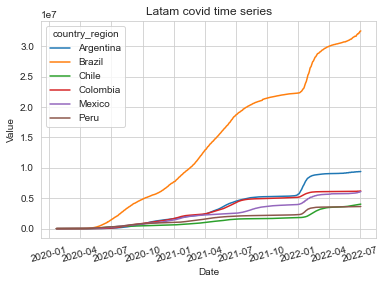

In [22]:
sns.lineplot(
    data=some_latam_countries_df,
    x="date",
    y="value",
    hue="country_region"
)

plt.xticks(rotation=15)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Latam covid time series");

Si el código está listo para producto, es decir, para la entrega final, se ingresa dentro de una función:

In [27]:
def covid_time_series():
    sns.lineplot(
        data=some_latam_countries_df,
        x="date",
        y="value",
        hue="country_region"
    )

    plt.xticks(rotation=15)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title("Latam covid time series");

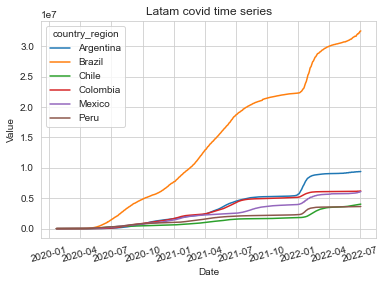

In [28]:
covid_time_series()

Como se pueden tener otros valores diferentes en el `df`, se puede generalizar. Para esto, se asigna una variable a la variable data y se pasa como parámetro de la función:

In [29]:
# DF: covid_df.
some_latam_countries_df.head(3)

,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


In [31]:
def covid_time_series(df):
    sns.lineplot(
        data=df,
        x="date",
        y="value",
        hue="country_region"
    )

    plt.xticks(rotation=15)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title("Latam covid time series");

Ahora se pasa como argumento el df `some_latam_countries_df`:

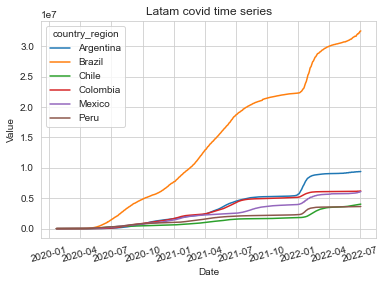

In [32]:
covid_time_series(some_latam_countries_df)

Una vez terminado el producto (la función final), se envía a la respectiva carpeta de visualizaciones. Se procede a importar el módulo con la función:

In [33]:
import final_project.visualization.visualize as visualize

Ahora ya se puede hacer uso del módulo de visualizaciones:

I can modify anything in the function because of the lines: %load_ext autoreload and %autoreload 2


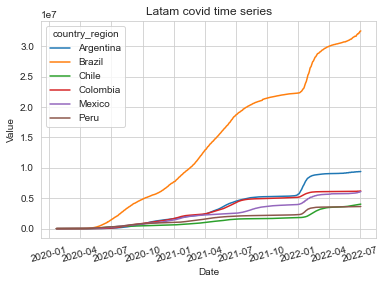

In [38]:
visualize.covid_time_series(some_latam_countries_df)

---

#### Latam in global context

Top `n` countries.

In [23]:
top_countries_df = (
    processed_covid_df
    .select_columns(["country_region", "value"])
    .groupby(["country_region"])
    .aggregate("sum")
    .sort_values("value", ascending=False)
    .reset_index()
    .head(20)
    .transform_column(
        column_name="country_region",
        function=lambda x: "red" if x in countries else "lightblue",
        dest_column_name="color"
    )
)

top_countries_df.head()

,country_region,value,color
0,US,29515718231,lightblue
1,India,18050121891,lightblue
2,Brazil,12414423289,red
3,France,6899244369,lightblue
4,United Kingdom,6128016941,lightblue


Plot to Latam in highlighted bars.

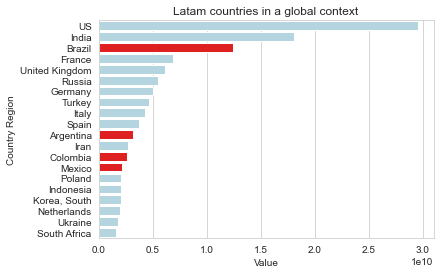

In [24]:
sns.barplot(
    data=top_countries_df,
    x="value",
    y="country_region",
    palette=top_countries_df.color
)

plt.xlabel("Value")
plt.ylabel("Country Region")
plt.title("Latam countries in a global context");

---

### Challenge:
Abstrayendo el código para reutilizarlo como módulo:

In [48]:
def covid_countries_incidences(df_2):
    df_2 = (
        processed_covid_df
        .select_columns(["country_region", "value"])
        .groupby(["country_region"])
        .aggregate("sum")
        .sort_values("value", ascending=False)
        .reset_index()
        .head(20)
        .transform_column(
            column_name="country_region",
            function=lambda x: "red" if x in countries else "lightblue",
            dest_column_name="color"
        )
    )

    sns.barplot(
        data=df_2,
        x="value",
        y="country_region",
        palette=df_2.color
    )

    plt.xlabel("Value")
    plt.ylabel("Country Region")
    plt.title("Latam countries in a global context");

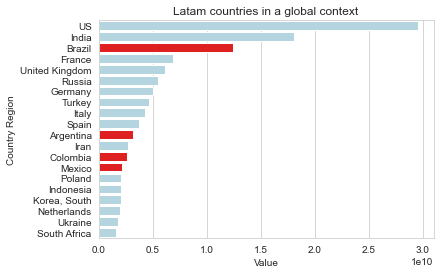

In [49]:
covid_countries_incidences(top_countries_df)

Se agregó al archivo `visualize.py` y se importó: 

In [53]:
import final_project.visualization.visualize as visualize

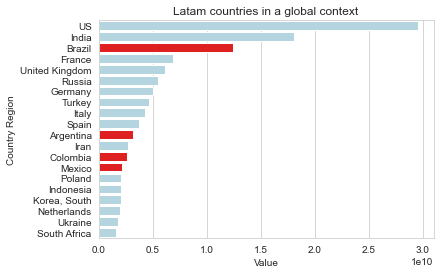

In [61]:
visualize.covid_countries_incidences(top_countries_df, countries, processed_covid_df)